
Drinking Prediction Model with Health Data
for Futrue
#1. 분석목표
건강검진 데이터를 통해 음주여부 예측하는 모델을 만들고

이를 통해 생활습관을 가이드하는데 도움이 되고자 하는 것

#2. 데이터
건강검진 데이터(국민보험공단)

약 2만명의 데이터를 기반으로 분석진행

#3. 분석모델
음주여부를 판단하는 이진분류문제이므로 
분류모델 사용( Randomforestclassifier, XGBClassifier)

#4. 평가지표
분류모델의 평가지표인 accuracy, precision, recall, f1_score, auc_roc curve을

확인하면서 모델 개선 시행

(분석모델과 평가지표에 대해서는 해당 과정에서 부가적으로 설명)


#*Features 


'가입자일련번호'= ­ 1 ~ 1,000,000

'성별코드'(sex)= ­ 성별 : 1(남자), 2(여자)

'연령대코드(5세단위)'(age)= ­ 5세 단위 그룹화  예) 0~4세 ==> 1

'신장(5Cm단위)'(height)=   예) 100~104CM -> 100CM

'체중(5Kg단위)'(weight=  예) 25~29KG -> 25KG

'허리둘레'=  검진자의 허리둘레

'시력(좌)'(sight)=  수검자의 좌측 눈의 시력 

­* 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기

'시력(우)'=  수검자의 우측 눈의 시력

­* 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기

'청력(좌)'(hear)=  수검자의 좌측 귀의 청력 ­== 1(정상), 2(비정상)

'청력(우)'=  수검자의 우측 귀의 청력 ­== 1(정상), 2(비정상)

'수축기혈압'=  검진자의 최고 혈압으로 심장이 수축해서 강한 힘으로 혈액을 동맥에 보낼 때의 혈관 내압

'이완기혈압'=  검진자의 최저 혈압으로 심장의 완기시의 혈압

'식전혈당(공복혈당)'=  검진자 식사 전 혈당(혈액 100ml당 함유 되어 있는 포도당의 농도) 수치

'총콜레스테롤'=  혈청 중의 에스텔형, 비에스테형(유리)콜레스테롤의 합

­* 정상치는 150 ~ 250mg/dL 약 1/3이 비에스텔형(유리)콜레스테롤이며 나머지가 콜레스테롤에스테르 

'트리글리세라이드'=  단순지질 혹은 중성지질을 뜻함

­* 정상치는 30 ~ 135mg/dL(0.34~1.52-mmol/ℓ)  

'HDL콜레스테롤'=  HDL(고밀도 리포단백질)에 포함되는 콜레스테롤

­* 정상치는 30 ~ 65mg/dL

'LDL콜레스테롤'=  LDL(저밀도 리포단백질)에 함유된 콜레스테롤

­* 170mg/dL 이상일 경우 일반적으로 고LDL혈증으로 봄

'혈색소'=  혈액이나 혈구 속에 존재하는 색소단백으로 글로빈(globin)과 엠(heme)으로 구성되며 혈중의 산소운반체로서의 역할 수행

'요단백'(up)= 소변에 단백질이 섞여서 나오는 것

­* 1(-), 2(±), 3(+1), 4(+2), 5(+3), 6(+4)로 표기

'혈청크레아티닌'=  크레아티닌은 크레아틴의 탈수물로 내인성 단백대사의 종말산물로서 신장에서 배설되고 그 증감은 음식물에 관계없이 근육의 발육과 운동에 관계함

­* 정상치 0.8~1.7mg/dL

'(혈청지오티)AST'=  간 기능을 나타내는 혈액검사상의 수치, 간세포 이외에 심장, 신장, 뇌 , 근육 등에도 존재하는 효소로 이러한 세포들이 손상을 받는 경우 농도가 증가함

­* 정상치 0~40IU/L

'(혈청지오티)ALT'=  간 기능을 나타내는 혈액검사상의 수치, ALT는 주로 간세포 안에 존재하는 효소로, 간세포가 손상을 받는 경우 농도가 증가함

­* 정상치 0~40IU/L

'감마지티피'=  간 기능을 나타내는 혈액검사상의 수치, 간 내의 쓸개관(담관)에 존재하는 효소로 글루타민산을 외부에 펩티드나 아미노산 등으로 옮기는 작용을 함, 쓸개즙(담즙) 배설 장애, 간세포 장애 발생 시 혈중에 증가하게 됨

­* 정상치 남성 11~ 63IU/L, 여성 8~ 35IU/L

'흡연상태'(smoke)= ­ 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)

Target '음주여부'(alcohol)= ­ 0(마시지 않는다), 1(마신다)

(이 또한 그래프로 시각화 하는 과정에서 설명)

## 데이터 preprocessing

In [45]:
%%capture
import sys


if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold, KFold
from scipy.stats import randint, uniform
from sklearn.metrics import f1_score, classification_report, roc_auc_score, accuracy_score, plot_confusion_matrix
from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
from lightgbm import LGBMClassifier, plot_importance

In [57]:
# 데이터 불러오기
health= '/content/drive/MyDrive/Colab Notebooks/health final.csv'

df = pd.read_csv(health, encoding= 'cp949')
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,92.0,48.0,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,121.0,55.0,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1,NaN,NaN,NaN,NaN,2.0,20181126
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,104.0,41.0,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,106.0,76.0,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,104.0,61.0,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [58]:
# 데이터가 너무 많아서 일부만 추출
df= df.sample(frac=0.02, replace=True, random_state=1)

In [6]:
# 특성 결측치 확인
df.isna().sum()

기준년도                0
가입자일련번호             0
성별코드                0
연령대코드(5세단위)         0
시도코드                0
신장(5Cm단위)           0
체중(5Kg단위)           0
허리둘레                5
시력(좌)               7
시력(우)               7
청력(좌)               6
청력(우)               6
수축기혈압               0
이완기혈압               0
식전혈당(공복혈당)          1
총콜레스테롤              1
트리글리세라이드            1
HDL콜레스테롤            1
LDL콜레스테롤           50
혈색소                 2
요단백               101
혈청크레아티닌             1
(혈청지오티)AST          1
(혈청지오티)ALT          1
감마지티피               1
흡연상태                5
음주여부               16
구강검진수검여부            0
치아우식증유무         20000
결손치유무           20000
치아마모증유무         20000
제3대구치(사랑니)이상    20000
치석              12053
데이터공개일자             0
dtype: int64

In [59]:
# 결측치가 너무 많은 데이터 삭제
drop=['치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
      '치석', '데이터공개일자', '기준년도']

df.drop(drop, axis=1, inplace=True)

In [60]:
# 중복값 
df.duplicated().sum()
# 중복값 제거
df.drop_duplicates(inplace=True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
가입자일련번호,19816.0,497696.269782,288368.383672,81.0,247824.5,495249.0,748426.75,999973.0
성별코드,19816.0,1.469217,0.499064,1.0,1.0,1.0,2.00,2.0
연령대코드(5세단위),19816.0,10.555057,2.834024,5.0,9.0,10.0,13.00,18.0
시도코드,19816.0,33.635396,12.678240,11.0,26.0,41.0,43.00,50.0
신장(5Cm단위),19816.0,162.216138,9.240809,130.0,155.0,160.0,170.00,190.0
체중(5Kg단위),19816.0,63.241068,12.455761,30.0,55.0,60.0,70.00,135.0
허리둘레,19811.0,81.166009,9.543670,42.0,74.1,81.0,87.50,128.0
시력(좌),19809.0,0.977828,0.621727,0.1,0.7,1.0,1.20,9.9
시력(우),19809.0,0.974441,0.613912,0.1,0.7,1.0,1.20,9.9
청력(좌),19810.0,1.032812,0.178148,1.0,1.0,1.0,1.00,2.0


In [61]:
# 특성 이름 변경
df.columns= ['number', 'sex', 'age', 'sido', 'height', 'weight', 'waist', 'sight_l', 'sight_r',
             'hear_l', 'hear_r', 'sbp', 'dbp', 'fbs', 'total_cho', 'trigly', 'hdl', 'ldl', 'hemo', 'up', 'creatin', 'ast', 'alt', 'gtp', 'smoke', 'alcohol', 'hchk']

In [62]:
# 요단백 결측치 최빈치로
df.up.mode()
df['up']= df['up'].fillna(1)

# LDL콜레스테롤 결측치 중간값으로
# (평균치는 이상치에 영향이 있기 때문에 중간값으로 지정)
df['ldl']= df['ldl'].fillna(111)

# bmi 지수 추가
df['bmi']= df.weight / ((df.height / 100)**2) 

# 이외의 결측치는 많지 않으므로 drop
df= df.dropna(axis=0)

In [63]:
# data clean
def clean(df):

  outlier = ['sight_l', 'sight_r', 'trigly', 'ast', 'gtp']

  for i in outlier:
    # 이상치 제거
    df[i]= df[df[i] < np.percentile(df[i], 99.9)][i]

    # 이상치 제거 후 결측치 삭제
    df= df.dropna(subset=[i], axis=0)

  return df

In [64]:
df= clean(df)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,19600.0,497752.516327,288357.498441,81.000000,247566.000000,495589.500000,748430.750000,999973.000000
sex,19600.0,1.469490,0.499081,1.000000,1.000000,1.000000,2.000000,2.000000
age,19600.0,10.535306,2.826348,5.000000,9.000000,10.000000,13.000000,18.000000
sido,19600.0,33.631582,12.673968,11.000000,26.000000,41.000000,43.000000,50.000000
height,19600.0,162.238520,9.233217,130.000000,155.000000,160.000000,170.000000,190.000000
weight,19600.0,63.247194,12.460166,30.000000,55.000000,60.000000,70.000000,135.000000
waist,19600.0,81.135301,9.541070,53.000000,74.000000,81.000000,87.425000,128.000000
sight_l,19600.0,0.948347,0.341412,0.100000,0.700000,1.000000,1.200000,2.000000
sight_r,19600.0,0.945526,0.338807,0.100000,0.700000,1.000000,1.200000,2.000000
hear_l,19600.0,1.031939,0.175842,1.000000,1.000000,1.000000,1.000000,2.000000


## 데이터 EDA

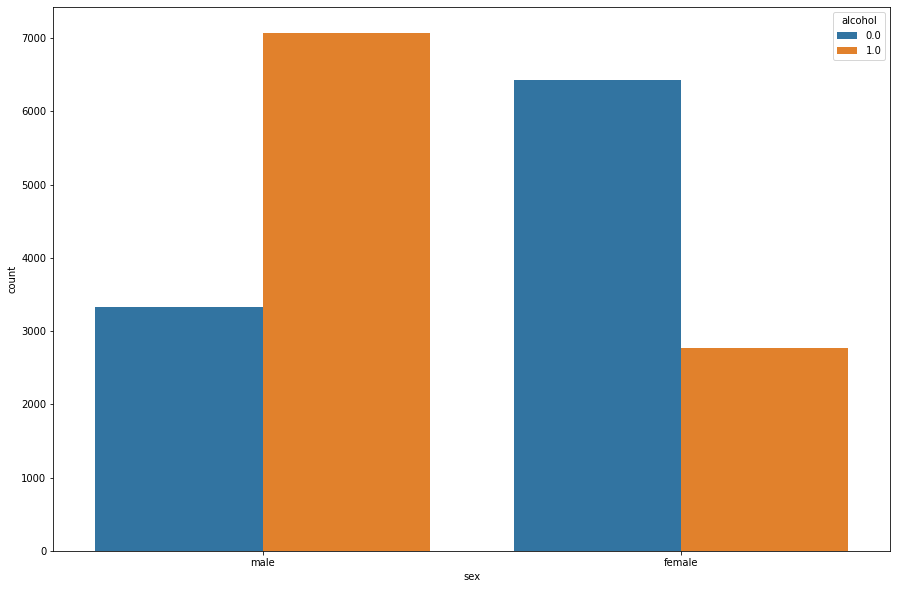

In [14]:
# 성별에 따라 음주여부 비율
# 남성과 여성의 비율이 비슷한 것을 알 수 있고 
# 남성은 마신다에 많았고 여성은 마시지 않는다가 많았습니다.

plt.figure(figsize= (15, 10))
sns.countplot(x='sex', data= df, hue= 'alcohol')
plt.xticks([0,1], ['male', 'female']);

In [20]:
df.sex.value_counts(normalize=True)

1    0.53051
2    0.46949
Name: sex, dtype: float64

In [21]:
df.alcohol.value_counts(normalize=True)

1.0    0.50199
0.0    0.49801
Name: alcohol, dtype: float64

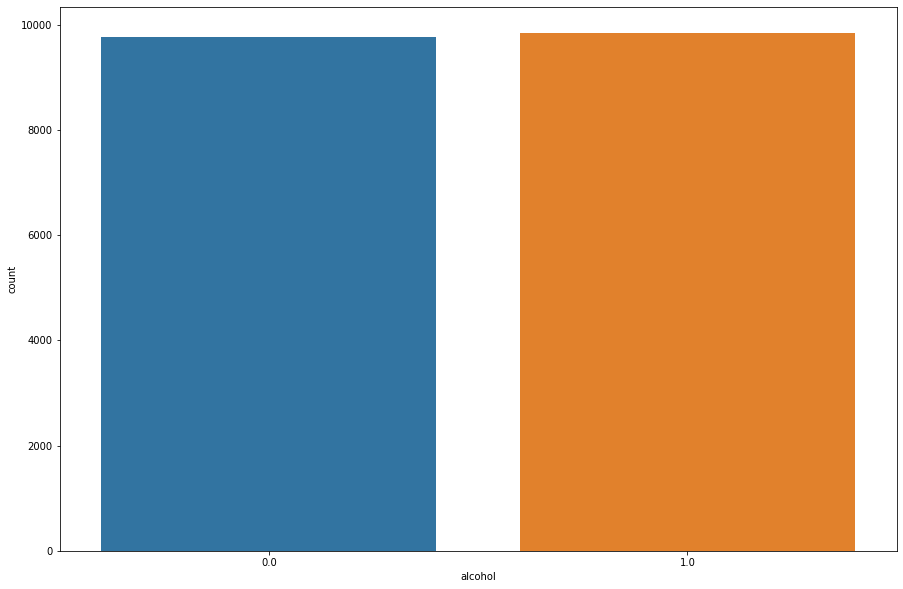

In [67]:
plt.figure(figsize= (15,10))
sns.countplot(df.alcohol)

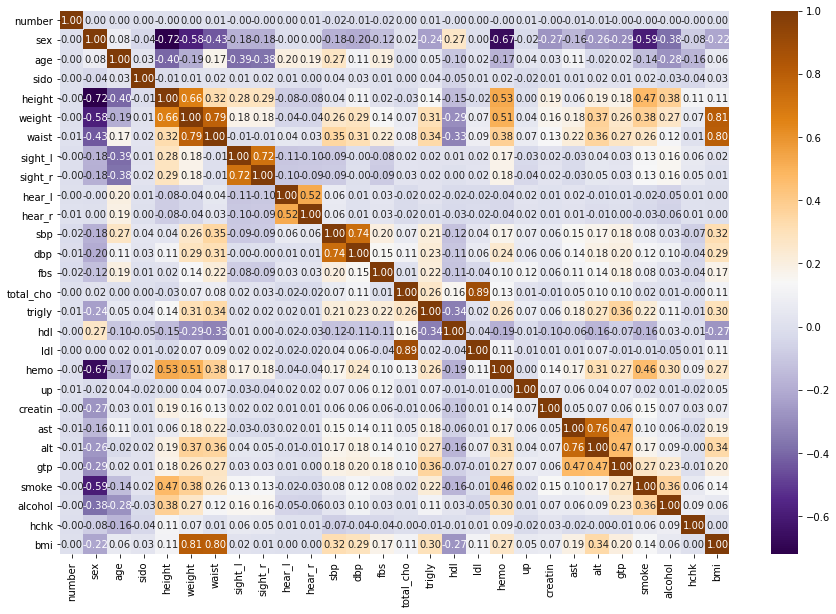

In [ ]:
# 상관계수 (0에 가까운 것은 의미가 없음)
plt.figure(figsize= (15, 10))

sns.heatmap(df.corr(), annot=True, fmt= '.2f',cmap= 'PuOr_r')

In [65]:
# 체중과 신장 상관계수가 높은 편인데 BMI지수 상관계수는 낮다
pd.DataFrame(df.corr().alcohol.sort_values(ascending=False))

,alcohol
alcohol,1.000000
height,0.379026
smoke,0.361929
hemo,0.302108
weight,0.265515
gtp,0.229471
sight_l,0.160119
sight_r,0.158718
waist,0.123426
trigly,0.109461


In [15]:
# 0에 가까운 특성 drop (가입자 번호(number) 제외)
drop2= ['total_cho', 'up', 'sido']
df = df.drop(drop2, axis=1)

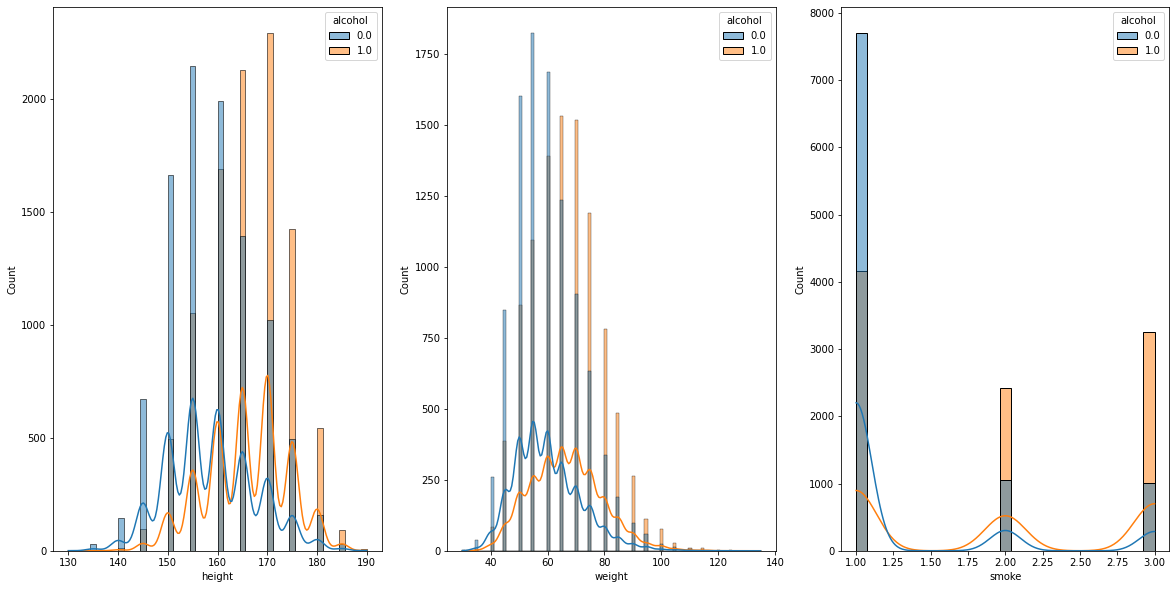

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
sns.histplot(data=df, x='height', hue='alcohol', kde=True, ax=ax[0])
sns.histplot(data=df, x='smoke', hue='alcohol', kde=True, ax=ax[2])
sns.histplot(data=df, x='weight', hue='alcohol', kde=True, ax=ax[1])
# 신장과 체중이 이와같은 그래프 보여주는 것은 이 데이터의 남성과 여성의 비율이 비슷하고 
# 성별에 따라서 음주여부가 반대인 성향을 띄기 때문이라고 볼 수 있다.

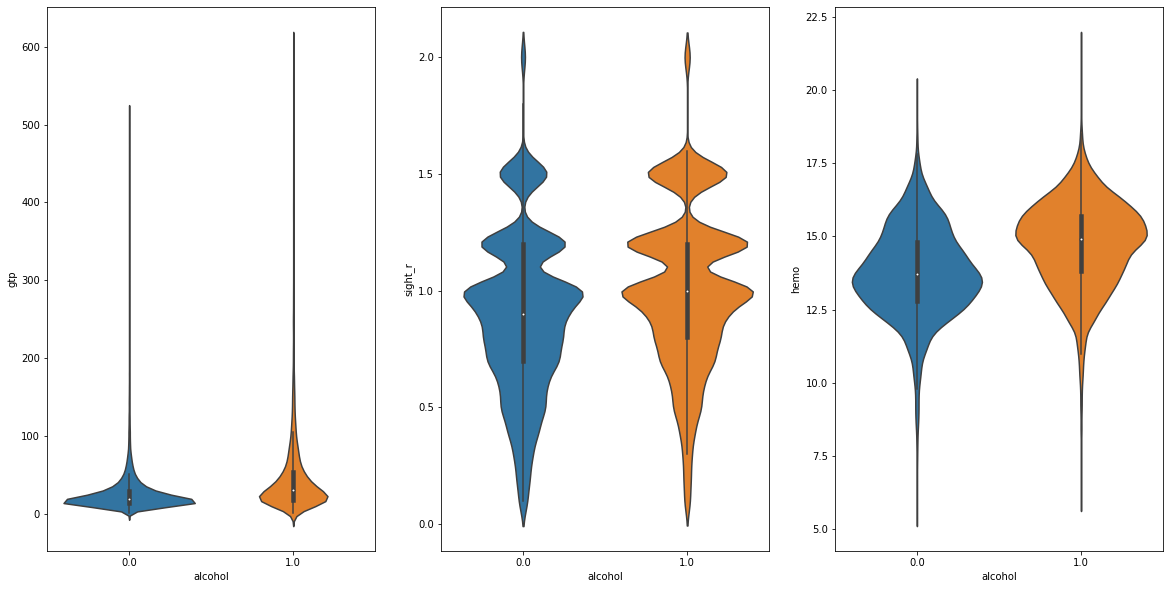

In [44]:
fig, ax = plt.subplots(1,3, figsize=(20, 10))
sns.violinplot(data = df, x = 'alcohol', y = 'gtp', ax= ax[0])
sns.violinplot(data = df, x = 'alcohol', y = 'sight_r', ax= ax[1])
sns.violinplot(data = df, x = 'alcohol', y = 'hemo', ax= ax[2])

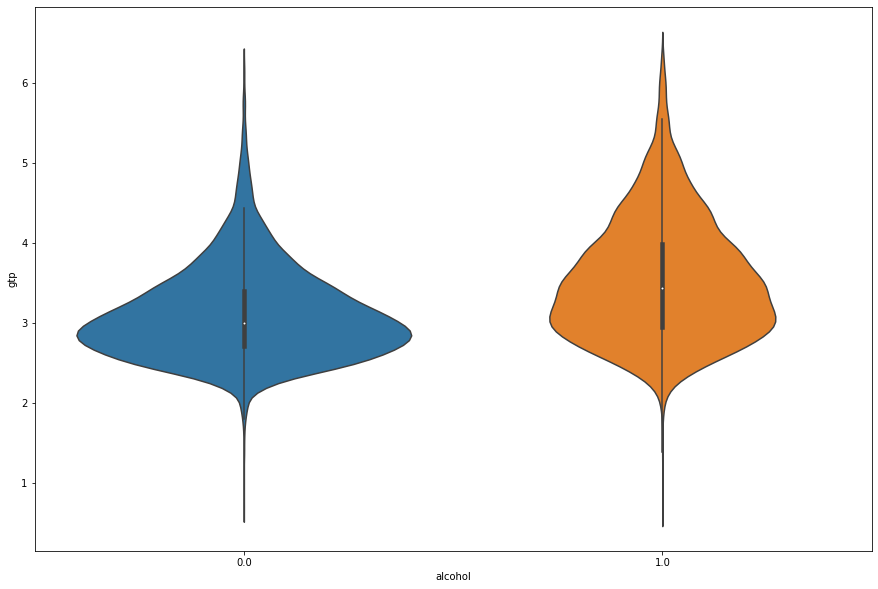

In [42]:
# gtp log 변환
plt.figure(figsize= (15,10))
plots=pd.DataFrame()
plots['gtp']= np.log1p(df.gtp)
sns.violinplot(data=df, x='alcohol', y=plots['gtp'])

# 데이터 leakage 방지 

모델의 성능을 판단하는 과정에서 훈련 데이터 셋, 

검증 데이터 셋에선 좋은 성능을 보이지만

실제로는 제대로 작동을 못 하는 경우가 발생 할 수 있는데

이는 데이터 누수로 인해 훈련 데이터에 타겟에 대한 정보가 포함됐지만, 

그 정보를 실제 예측에서는 사용할 수 없는 경우 발생

# 데이터 누수 방지

= 타겟 값이 결정된 후 생성된 모든 변수들을 데이터 셋에서 제외

= 검증 데이터와 훈련 데이터 분리

In [20]:
# target 설정
target= 'alcohol'
features= df.columns.drop(target)

In [21]:
features

Index(['number', 'sex', 'age', 'height', 'weight', 'waist', 'sight_l',
       'sight_r', 'hear_l', 'hear_r', 'sbp', 'dbp', 'fbs', 'trigly', 'hdl',
       'ldl', 'hemo', 'creatin', 'ast', 'alt', 'gtp', 'smoke', 'hchk', 'bmi'],
      dtype='object')

In [22]:
# train, val, test set 분리


from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.20, 
                              stratify=df[target], random_state=2)

train, val = train_test_split(train, test_size=0.20, 
                              stratify=train[target], random_state=2)

train.shape, val.shape, test.shape

((12544, 25), (3136, 25), (3920, 25))

In [23]:
# train, val, test 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [24]:
# 분포 비율 ( 균일한 분류 문제 )
print(train[target].value_counts(normalize=True))

# 전체 데이터 기준모델 설정
major= df[target].mode()[0]
pred= [major] * len(df[target])
baseline= accuracy_score(df[target], pred)
print('baseline_accuarcy_Score=', baseline)

1.0    0.501993
0.0    0.498007
Name: alcohol, dtype: float64
baseline_accuarcy_Score= 0.5019897959183673


In [25]:
# RandomForest
pipe_rf = make_pipeline(
    RandomForestClassifier(n_jobs=-1, 
                           max_depth= 2,
                           min_samples_split=2,
                           min_samples_leaf= 10,
                           random_state=2)
)

pipe_rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=2, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=10,
                                        min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=2,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [26]:
# rf정확도
pred_val= pipe_rf.predict(X_val)
print('train_score=', pipe_rf.score(X_train, y_train))
print('val_score=', pipe_rf.score(X_val, y_val))
print('f1_score=', f1_score(y_val, pred_val))
print('accuracy_score=', accuracy_score(y_val, pred_val))

print(classification_report(y_val, pred_val))

train_score= 0.7021683673469388
val_score= 0.6996173469387755
f1_score= 0.6982703395259449
accuracy_score= 0.6996173469387755
              precision    recall  f1-score   support

         0.0       0.70      0.71      0.70      1562
         1.0       0.70      0.69      0.70      1574

    accuracy                           0.70      3136
   macro avg       0.70      0.70      0.70      3136
weighted avg       0.70      0.70      0.70      3136



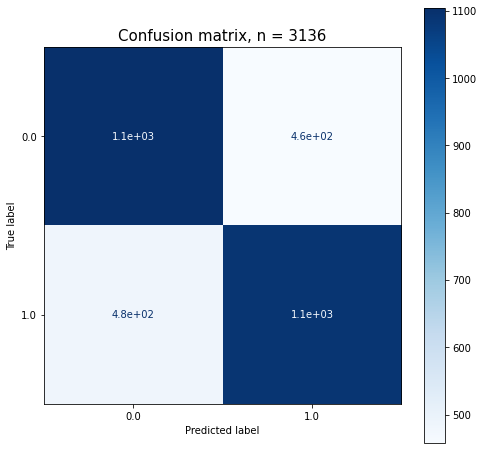

In [31]:
# confusion metrix
# 실제 음주를 하는 사람들을 예측해서 건강 가이드 피드백
# 재현율에 비중을 두고 음주여부 예측 recall, f1_score
fig, ax = plt.subplots(figsize=(8, 8))


pcm = plot_confusion_matrix(pipe_rf, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

AUC score:  0.7720276841829539


Text(0, 0.5, 'TPR')

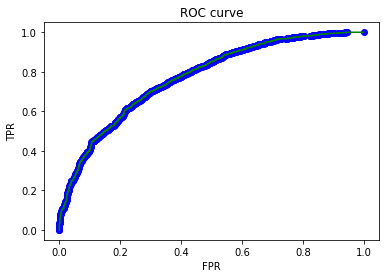

In [27]:
# roc score
# 음주여부를 구분하는 지표로 활용
y_pred_proba = pipe_rf.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

# AUC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [28]:
# 더 좋은 성능을 낼 수 있게 하이퍼파라미터 튜닝

dists = {
    'randomforestclassifier__criterion': ['entrophy', 'gini'], # 분할 품질을 측정하는 기능
    'randomforestclassifier__n_estimators': randint(50, 120), # 모델에 사용할 트리 개수
    'randomforestclassifier__max_depth': np.arange(1, 10), # 트리 깊이
    'randomforestclassifier__max_features': uniform(0, 1), # 분할에 사용할 특성 수
    'randomforestclassifier__min_samples_leaf': np.arange(1, 15, 5) # 리프 노드에 있어야 할 최소 샘플 수
}

clf_rf = RandomizedSearchCV(
    pipe_rf, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring= 'accuracy',  
    verbose=1,
    n_jobs=-1
)

clf_rf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.1min finished


In [29]:
# 최적값과 score
print('최적 하이퍼파라미터= ', clf_rf.best_params_)
print('accuracy_score= ', clf_rf.best_score_)

최적 하이퍼파라미터=  {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 7, 'randomforestclassifier__max_features': 0.46412988123086607, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 92}
accuracy_score=  0.7297521490205687


In [30]:
# 최적의 파라미터 값으로 모델 학습 ( 성능이 향상됨 약 2% )
# train data가 정확도가 높음 = 과적합
best_rf = clf_rf.best_estimator_
best_rf.fit(X_train, y_train)
pred_val_rf = best_rf.predict(X_val)

print('train_score=', best_rf.score(X_train, y_train))
print('val_score=', best_rf.score(X_val, y_val))
print('f1_score=', f1_score(y_val, pred_val_rf))
print('accuracy_score=', accuracy_score(y_val, pred_val_rf))

print(classification_report(y_val, pred_val_rf))

# roc_auc_score
y_pred_proba1 = best_rf.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba1))

train_score= 0.7712850765306123
val_score= 0.7206632653061225
f1_score= 0.7277812305779987
accuracy_score= 0.7206632653061225
              precision    recall  f1-score   support

         0.0       0.73      0.70      0.71      1562
         1.0       0.71      0.74      0.73      1574

    accuracy                           0.72      3136
   macro avg       0.72      0.72      0.72      3136
weighted avg       0.72      0.72      0.72      3136

AUC score:  0.808851666078253


In [31]:
# XGboost

pipe_xg = make_pipeline(
    XGBClassifier(max_depth=2,
                  random_state=10,
                  min_samples_split=2,
                  min_samples_leaf= 10,
                  n_jobs=-1) 

)

pipe_xg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, min_samples_leaf=10,
                               min_samples_split=2, missing=None,
                               n_estimators=100, n_jobs=-1, nthread=None,
                               objective='binary:logistic', random_state=10,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

In [32]:
# xg정확도
pred_valxg= pipe_xg.predict(X_val)
print('train_score=', pipe_xg.score(X_train, y_train))
print('val_score=', pipe_xg.score(X_val, y_val))
print('f1_score=', f1_score(y_val, pred_valxg))
print('accuracy_score=', accuracy_score(y_val, pred_valxg))

print(classification_report(y_val, pred_valxg))

y_pred_xgproba = pipe_xg.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_xgproba))

train_score= 0.7390784438775511
val_score= 0.7251275510204082
f1_score= 0.7291011942174733
accuracy_score= 0.7251275510204082
              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72      1562
         1.0       0.72      0.74      0.73      1574

    accuracy                           0.73      3136
   macro avg       0.73      0.73      0.73      3136
weighted avg       0.73      0.73      0.73      3136

AUC score:  0.8125161678166493


In [33]:
# xgboost 하이퍼파라미터 튜닝

dists_xg = {
    'xgbclassifier__n_estimators': randint(50, 120), # 모델에 사용할 트리 개수
    'xgbclassifier__max_depth': np.arange(1, 10), # 트리 깊이
    'xgbclassifier__max_features': uniform(0, 1), # 분할에 사용할 특성 수
    'xgbclassifier__min_samples_leaf': np.arange(1, 15, 5) # 리프 노드에 있어야 할 최소 샘플 수
}
clf_xg = RandomizedSearchCV(
    pipe_xg, 
    param_distributions=dists_xg, 
    n_iter=50, 
    cv=3, 
    scoring='accuracy',  
    verbose=1,
    n_jobs=-1
)

clf_xg.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.8min finished


In [34]:
# 최적값과 score
print('최적 하이퍼파라미터= ', clf_xg.best_params_)
print('accuracy_score=', clf_xg.best_score_)

최적 하이퍼파라미터=  {'xgbclassifier__max_depth': 4, 'xgbclassifier__max_features': 0.11343857774837673, 'xgbclassifier__min_samples_leaf': 6, 'xgbclassifier__n_estimators': 83}
accuracy_score= 0.7311069147384074


In [35]:
# 최적의 파라미터 값으로 모델 학습
# train data 정확도가 더 높음 = 과적합 4프로
best_xg = clf_xg.best_estimator_
best_xg= best_xg.fit(X_train, y_train)
pred_val_xg = best_xg.predict(X_val)

print('train_score=', best_xg.score(X_train, y_train))
print('val_score=', best_xg.score(X_val, y_val))
print('f1_score=', f1_score(y_val, pred_val_xg))
print('accuracy_score=', accuracy_score(y_val, pred_val_xg))

print(classification_report(y_val, pred_val_xg))

# roc_auc_score
y_pred_xgproba1 = best_xg.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_xgproba1))

train_score= 0.7687340561224489
val_score= 0.7283163265306123
f1_score= 0.7315689981096409
accuracy_score= 0.7283163265306123
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.72      1562
         1.0       0.73      0.74      0.73      1574

    accuracy                           0.73      3136
   macro avg       0.73      0.73      0.73      3136
weighted avg       0.73      0.73      0.73      3136

AUC score:  0.8132676153955034


In [36]:
# score
rf_score= f1_score(y_val, pred_val)
rf_best_score= f1_score(y_val, pred_val_rf)
xg_score= f1_score(y_val, pred_valxg)
xg_best_score= f1_score(y_val, pred_val_xg)

#accuracy
rf_accuracy= accuracy_score(y_val, pred_val)
rf_best_accuracy= accuracy_score(y_val, pred_val_rf)
xg_accuracy= accuracy_score(y_val, pred_valxg)
xg_best_accuracy= accuracy_score(y_val, pred_val_xg)

# roc_auc_Score
rf_roc= roc_auc_score(y_val, y_pred_proba)
rf_best_roc= roc_auc_score(y_val, y_pred_proba1)
xg_roc= roc_auc_score(y_val, y_pred_xgproba)
xg_best_roc= roc_auc_score(y_val, y_pred_xgproba1)

In [37]:
# score
model_ev = pd.DataFrame({'Model': ['Randomforest', 'Randomforest_best', 'XGboost', 'XGboost_best'],
                         'f1_score': [rf_score*100, rf_best_score*100, xg_score*100, xg_best_score*100],
                         'roc_auc_score': [rf_roc*100, rf_best_roc*100, xg_roc*100, xg_best_roc*100],
                         'accuracy_score': [rf_accuracy*100, rf_best_accuracy*100 , xg_accuracy*100, xg_best_accuracy*100]})
model_ev.T

,0,1,2,3
Model,Randomforest,Randomforest_best,XGboost,XGboost_best
f1_score,69.827,72.7781,72.9101,73.1569
roc_auc_score,77.2028,80.8852,81.2516,81.3268
accuracy_score,69.9617,72.0663,72.5128,72.8316


In [69]:
# 훈련,검증 데이터 정확도차이가 작은 것
# test data
best_xg.fit(X_test, y_test)

y_test_pred_xg = best_xg.predict(X_test)

print('test_score=', best_xg.score(X_test, y_test))
print('test_f1_score=', f1_score(y_test, y_test_pred_xg))
print('accuracy_score=', accuracy_score(y_test, y_test_pred_xg))

print('baseline=', accuracy_score(df[target], pred))
print('test_roc', roc_auc_score(y_test, y_test_pred_xg))

test_score= 0.8211734693877552
test_f1_score= 0.8217645563183321
accuracy_score= 0.8211734693877552
baseline= 0.5019897959183673
test_roc 0.8211736138877783


In [40]:
# permuter 순열중요도 확인
# 모든 특성이 target에 어떻게 영향을 끼치는지 확인

permuter = PermutationImportance(
    best_xg.named_steps['xgbclassifier'], 
    scoring='accuracy', 
    n_iter=5, 
    random_state=2
)

permuter.fit(X_test, y_test);

feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names 
)

Weight,Feature
0.0792 ± 0.0062,age
0.0734 ± 0.0065,gtp
0.0387 ± 0.0020,alt
0.0382 ± 0.0107,smoke
0.0352 ± 0.0049,hdl
0.0228 ± 0.0071,sex
0.0201 ± 0.0043,ast
0.0138 ± 0.0014,ldl
0.0127 ± 0.0055,number
0.0094 ± 0.0017,creatin


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


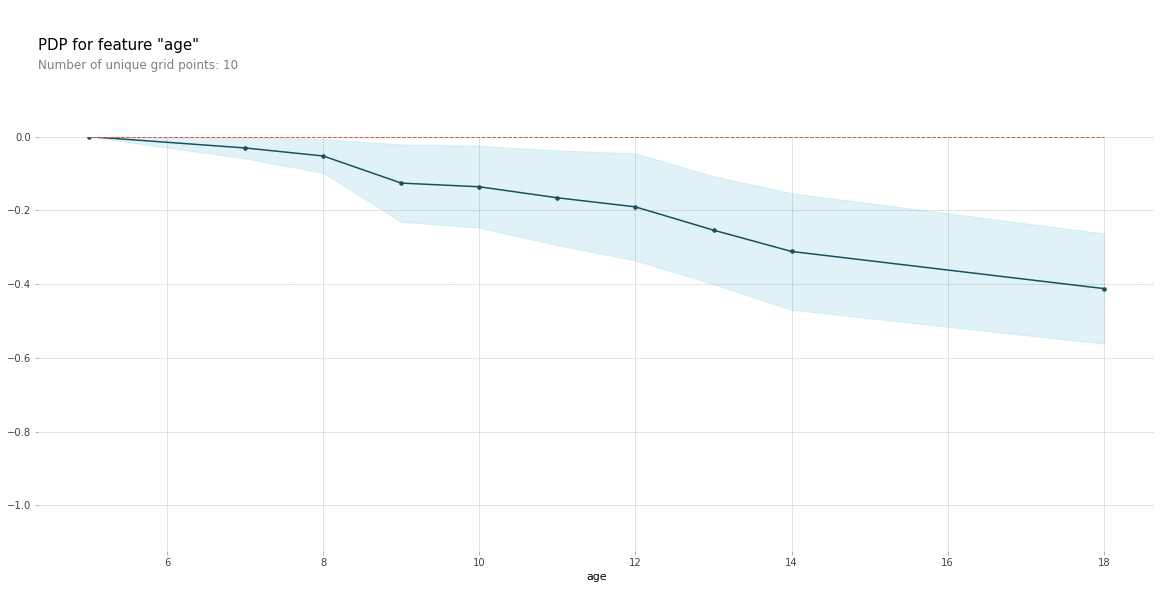

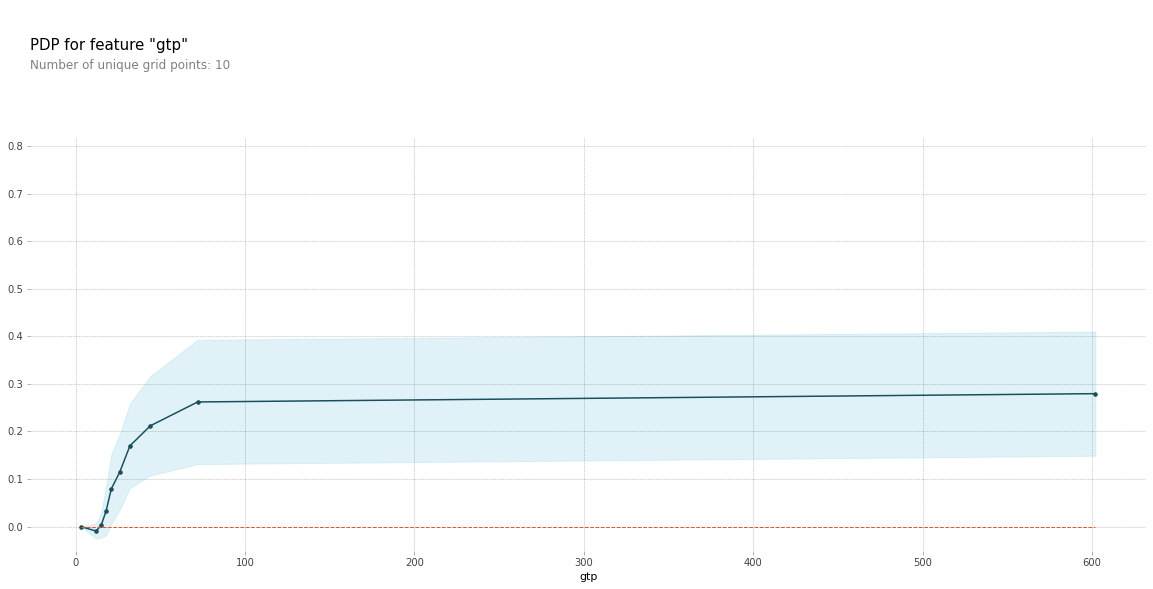

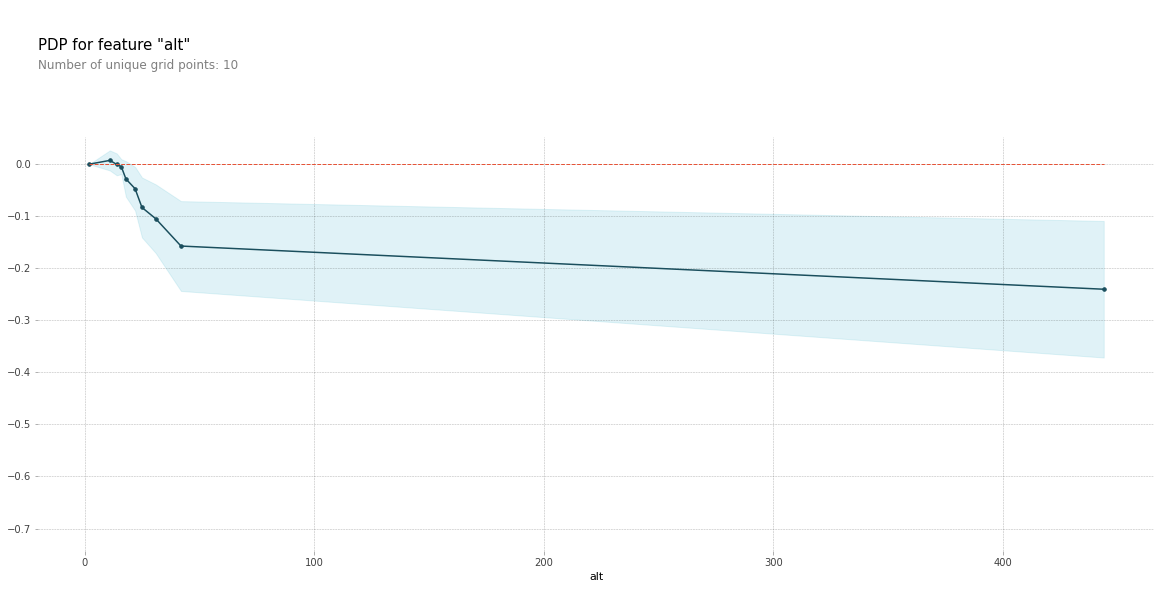

In [41]:
# 각 특성이 예측값에 어떤 영향을 주는지 확인 (age, gtp, sex, alt, smoke)
feature = ['age', 'gtp', 'alt']

for i in feature:
  isolated= pdp_isolate(
      model= best_xg,
      dataset= X_test,
      model_features= X_test.columns,
      feature= i
  )
  pdp_plot(isolated, feature_name=i, figsize= (20,10));

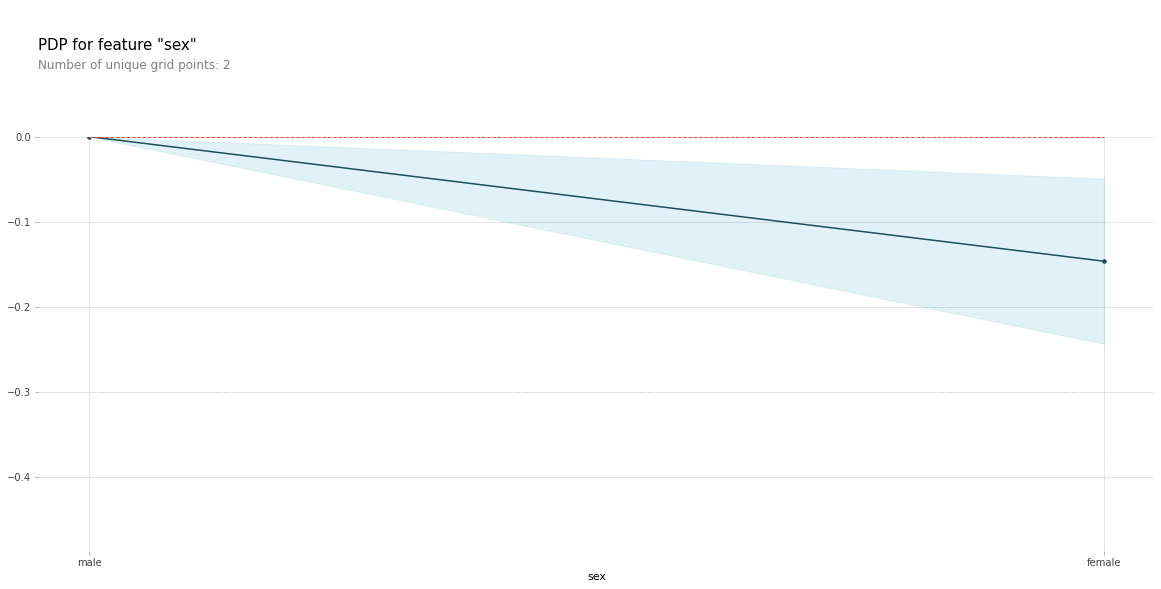

In [118]:
feature = 'sex'

isolated= pdp_isolate(
      model= best_xg,
      dataset= X_test,
      model_features= X_test.columns,
      feature= feature
  )
pdp_plot(isolated, feature_name=feature, figsize= (20,10))
plt.xticks([1,2], ['male', 'female']);

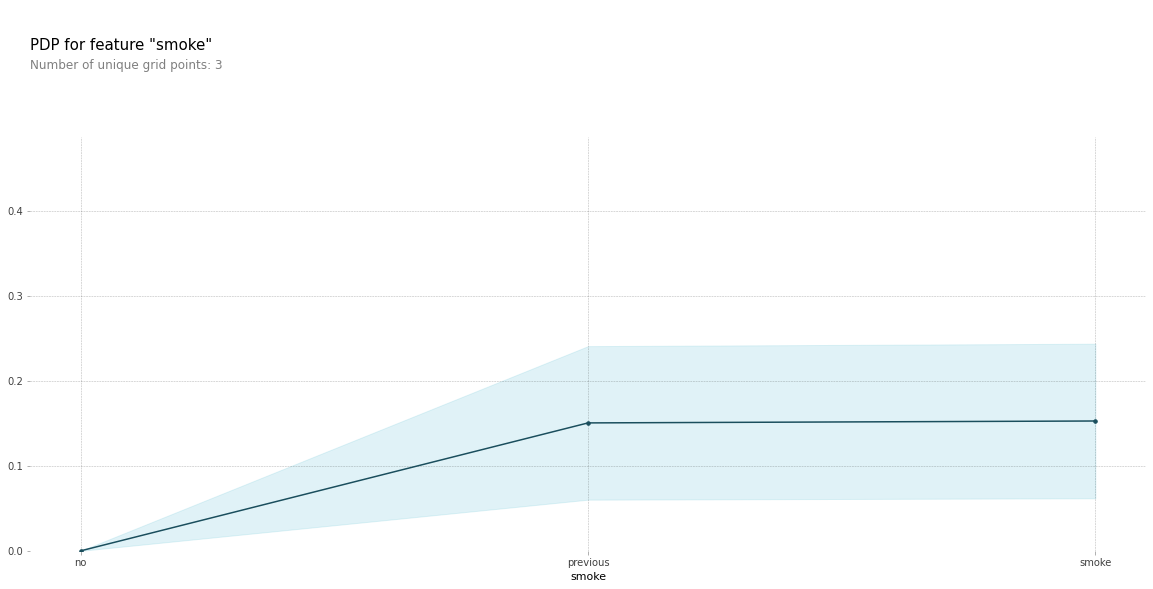

In [43]:
feature = 'smoke'

isolated= pdp_isolate(
      model= best_xg,
      dataset= X_test,
      model_features= X_test.columns,
      feature= feature
  )
pdp_plot(isolated, feature_name=feature, figsize= (20,10))
plt.xticks([1,2,3], ['no', 'previous', 'smoke']);

In [47]:
# 최종 모델 적용 (SHAP)
model = XGBClassifier(max_depth=4,
                      n_estimators= 63,
                      min_samples_leaf= 6,
                      n_jobs=-1,
                      random_state=10,
                      max_features= 0.15138769136419727
)
    
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              max_features=0.15138769136419727, min_child_weight=1,
              min_samples_leaf=6, missing=None, n_estimators=63, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [48]:
# 예측값 , 실제값 비교
final_proba = model.predict_proba(X_test)[:,1]

df_p = pd.DataFrame({
    'id': X_test.index, 
    'pred_proba': final_proba, # 예측확률 
    'actual_val': y_test # 실제값
})

df_p[X_test.columns] = X_test.values
df_p.drop(columns = 'id', inplace = True)
df_p.head()


,pred_proba,actual_val,number,sex,age,height,weight,waist,sight_l,sight_r,hear_l,hear_r,sbp,dbp,fbs,trigly,hdl,ldl,hemo,creatin,ast,alt,gtp,smoke,hchk,bmi
184483,0.719879,1.0,184484.0,1.0,8.0,175.0,90.0,92.1,1.0,1.0,1.0,1.0,138.0,88.0,99.0,194.0,42.0,157.0,16.5,1.1,23.0,34.0,32.0,2.0,0.0,29.387755
909408,0.552558,0.0,909409.0,1.0,11.0,170.0,75.0,92.0,0.5,0.4,1.0,1.0,134.0,75.0,156.0,62.0,41.0,96.0,14.4,1.0,18.0,17.0,26.0,2.0,0.0,25.951557
5786,0.303642,1.0,5787.0,2.0,10.0,165.0,65.0,78.0,0.8,1.0,1.0,1.0,127.0,69.0,88.0,58.0,58.0,114.0,12.1,0.6,25.0,19.0,10.0,1.0,0.0,23.875115
949382,0.293112,0.0,949383.0,1.0,14.0,165.0,65.0,83.0,1.2,1.2,1.0,1.0,125.0,70.0,87.0,223.0,44.0,56.0,16.7,0.9,27.0,31.0,33.0,1.0,0.0,23.875115
174446,0.245540,0.0,174447.0,2.0,10.0,150.0,45.0,67.2,0.6,0.7,1.0,1.0,94.0,53.0,97.0,42.0,59.0,129.0,11.5,0.7,16.0,10.0,8.0,1.0,0.0,20.000000


In [193]:
# 음주 여부
drink = df_p['actual_val'] == 1
no_drink = ~drink
right = (drink) == (df_p['pred_proba'] > 0.50)
wrong = ~right

In [194]:
# 술을 마시고 그렇다고 예측한 경우 TP (예측성공)
df_p[drink & right].sample(n=10, random_state=1).sort_values(by='pred_proba')

,pred_proba,actual_val,number,sex,age,height,weight,waist,sight_l,sight_r,hear_l,hear_r,sbp,dbp,fbs,trigly,hdl,ldl,hemo,creatin,ast,alt,gtp,smoke,hchk,bmi
394047,0.527829,1.0,394048.0,1.0,12.0,165.0,70.0,83.0,1.0,1.0,1.0,1.0,133.0,70.0,101.0,95.0,39.0,216.0,15.5,1.0,17.0,11.0,23.0,2.0,0.0,25.711662
509886,0.533976,1.0,509887.0,1.0,8.0,180.0,85.0,90.0,1.2,1.2,1.0,1.0,120.0,80.0,100.0,111.0,38.0,136.0,15.8,1.0,30.0,59.0,31.0,3.0,1.0,26.234568
719365,0.664904,1.0,719366.0,1.0,9.0,175.0,65.0,81.0,1.0,0.4,1.0,1.0,96.0,57.0,99.0,67.0,63.0,98.0,15.1,0.9,21.0,17.0,17.0,3.0,0.0,21.224490
10748,0.677136,1.0,10749.0,1.0,10.0,170.0,65.0,83.5,1.2,1.2,1.0,1.0,112.0,83.0,98.0,229.0,58.0,117.0,15.2,1.0,21.0,24.0,33.0,1.0,1.0,22.491349
436560,0.781992,1.0,436561.0,2.0,8.0,160.0,55.0,83.2,0.7,0.6,1.0,1.0,116.0,89.0,95.0,64.0,82.0,90.0,14.6,0.6,19.0,29.0,91.0,1.0,0.0,21.484375
533029,0.816699,1.0,533030.0,1.0,10.0,175.0,65.0,82.7,0.8,0.8,1.0,1.0,110.0,68.0,88.0,39.0,69.0,164.0,15.2,1.1,23.0,20.0,21.0,2.0,0.0,21.224490
876358,0.833114,1.0,876359.0,1.0,11.0,165.0,85.0,95.0,1.2,0.9,1.0,1.0,110.0,70.0,100.0,463.0,34.0,87.0,15.1,1.1,34.0,55.0,79.0,2.0,0.0,31.221304
247255,0.887615,1.0,247256.0,1.0,10.0,175.0,85.0,90.3,1.5,1.5,1.0,1.0,120.0,77.0,138.0,230.0,51.0,143.0,14.8,1.0,16.0,16.0,55.0,3.0,0.0,27.755102
108889,0.907534,1.0,108890.0,1.0,8.0,165.0,85.0,100.5,0.8,0.7,1.0,1.0,134.0,94.0,102.0,418.0,31.0,86.0,16.8,1.0,41.0,75.0,115.0,3.0,1.0,31.221304
794370,0.924008,1.0,794371.0,1.0,10.0,170.0,60.0,75.0,1.0,1.2,1.0,1.0,115.0,72.0,87.0,127.0,63.0,130.0,15.1,0.7,21.0,18.0,69.0,3.0,1.0,20.761246


In [207]:
row= X_test.loc[[108889]]
row

,number,sex,age,height,weight,waist,sight_l,sight_r,hear_l,hear_r,sbp,dbp,fbs,trigly,hdl,ldl,hemo,creatin,ast,alt,gtp,smoke,hchk,bmi
108889,108890,1,8,165,85,100.5,0.8,0.7,1.0,1.0,134.0,94.0,102.0,418.0,31.0,86.0,16.8,1.0,41.0,75.0,115.0,3.0,1,31.221304


In [208]:

# 91프로 확률로 술을 마신다고 예측
# gtp가 예측하는데 가장 큰 영향을 끼침, 
# 흡연과 나이순으로 타겟을 맞추는데 기여했다

# 모델 예측값
model.predict(row)

explainer = shap.TreeExplainer(model) 
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row,
    link= 'logit'
)

In [210]:
# 술을 마시지 않고 그렇다고 예측한 경우 TN (예측성공)
df_p[no_drink & right].sample(n=10, random_state=1).sort_values(by='pred_proba')

,pred_proba,actual_val,number,sex,age,height,weight,waist,sight_l,sight_r,hear_l,hear_r,sbp,dbp,fbs,trigly,hdl,ldl,hemo,creatin,ast,alt,gtp,smoke,hchk,bmi
357679,0.047645,0.0,357680.0,2.0,15.0,145.0,50.0,82.8,0.3,0.3,1.0,1.0,140.0,74.0,97.0,131.0,49.0,97.0,13.8,0.7,26.0,35.0,13.0,1.0,1.0,23.781213
765478,0.048844,0.0,765479.0,2.0,15.0,155.0,65.0,92.0,0.5,0.9,1.0,1.0,120.0,70.0,102.0,185.0,33.0,151.0,12.8,1.0,19.0,13.0,16.0,1.0,0.0,27.055151
666216,0.048904,0.0,666217.0,2.0,15.0,145.0,45.0,73.0,0.4,0.9,1.0,1.0,127.0,77.0,84.0,656.0,45.0,55.0,13.4,0.7,18.0,17.0,27.0,1.0,0.0,21.403092
758273,0.058310,0.0,758274.0,2.0,17.0,155.0,50.0,89.7,0.7,0.7,2.0,1.0,139.0,73.0,93.0,159.0,54.0,136.0,13.9,0.8,22.0,14.0,16.0,1.0,0.0,20.811655
190821,0.130147,0.0,190822.0,2.0,13.0,145.0,55.0,89.0,0.7,0.7,1.0,1.0,136.0,76.0,93.0,110.0,109.0,115.0,14.2,0.8,24.0,45.0,57.0,1.0,0.0,26.159334
453444,0.281808,0.0,453445.0,2.0,10.0,145.0,45.0,62.0,0.8,0.7,1.0,1.0,115.0,70.0,109.0,34.0,58.0,55.0,13.6,0.8,26.0,19.0,13.0,1.0,1.0,21.403092
702576,0.351392,0.0,702577.0,2.0,9.0,155.0,55.0,62.0,1.0,1.2,1.0,1.0,110.0,73.0,89.0,49.0,65.0,108.0,14.3,0.8,26.0,20.0,13.0,1.0,0.0,22.892820
564220,0.352553,0.0,564221.0,2.0,9.0,160.0,60.0,81.0,0.1,0.7,1.0,1.0,104.0,62.0,93.0,66.0,58.0,110.0,11.0,0.8,19.0,11.0,16.0,1.0,0.0,23.437500
859875,0.407758,0.0,859876.0,1.0,14.0,160.0,40.0,61.0,0.9,0.8,1.0,1.0,114.0,74.0,84.0,85.0,52.0,104.0,13.8,1.1,14.0,8.0,15.0,3.0,0.0,15.625000
899376,0.439819,0.0,899377.0,1.0,8.0,180.0,110.0,111.0,0.8,1.2,1.0,1.0,110.0,70.0,89.0,80.0,52.0,271.0,14.5,1.1,23.0,31.0,23.0,1.0,1.0,33.950617


In [211]:
row1 = X_test.loc[[190821]]  
row1

,number,sex,age,height,weight,waist,sight_l,sight_r,hear_l,hear_r,sbp,dbp,fbs,trigly,hdl,ldl,hemo,creatin,ast,alt,gtp,smoke,hchk,bmi
190821,190822,2,13,145,55,89.0,0.7,0.7,1.0,1.0,136.0,76.0,93.0,110.0,109.0,115.0,14.2,0.8,24.0,45.0,57.0,1.0,0,26.159334


In [212]:

# 87프로 확률로 술을 마시지 않는다고 예측
# 나이와 흡연 여부가 음주여부에 기여도가 높다 볼 수 있다.

# 모델 예측값
model.predict(row1)

explainer = shap.TreeExplainer(model) 
shap_values = explainer.shap_values(row1)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row1,
    link = 'logit'
)

In [213]:
# 술을 마시고 그렇지 않다고 예측 FN (오판단)
df_p[drink & wrong].sample(n=10, random_state=1).sort_values(by='pred_proba')

,pred_proba,actual_val,number,sex,age,height,weight,waist,sight_l,sight_r,hear_l,hear_r,sbp,dbp,fbs,trigly,hdl,ldl,hemo,creatin,ast,alt,gtp,smoke,hchk,bmi
682785,0.177165,1.0,682786.0,2.0,12.0,150.0,60.0,79.0,1.2,1.2,1.0,1.0,125.0,80.0,96.0,86.0,49.0,234.0,13.9,0.8,78.0,94.0,42.0,1.0,0.0,26.666667
676859,0.201330,1.0,676860.0,2.0,12.0,150.0,60.0,86.0,0.8,0.9,1.0,1.0,123.0,74.0,104.0,120.0,53.0,152.0,15.1,1.1,17.0,19.0,17.0,1.0,1.0,26.666667
602841,0.265619,1.0,602842.0,2.0,12.0,155.0,75.0,99.0,0.6,0.8,1.0,1.0,136.0,83.0,100.0,81.0,70.0,124.0,13.2,0.7,23.0,17.0,19.0,1.0,1.0,31.217482
252594,0.268755,1.0,252595.0,2.0,12.0,165.0,85.0,100.0,0.7,0.9,1.0,1.0,112.0,79.0,100.0,61.0,70.0,123.0,12.8,0.8,20.0,16.0,15.0,1.0,1.0,31.221304
73237,0.271223,1.0,73238.0,2.0,8.0,155.0,55.0,78.0,1.0,0.7,1.0,1.0,109.0,70.0,92.0,43.0,44.0,86.0,13.5,0.9,22.0,16.0,12.0,1.0,1.0,22.892820
826601,0.303564,1.0,826602.0,2.0,13.0,150.0,50.0,79.0,1.0,1.0,1.0,1.0,120.0,80.0,98.0,69.0,77.0,130.0,14.4,0.7,27.0,17.0,42.0,1.0,1.0,22.222222
961902,0.322658,1.0,961903.0,2.0,9.0,160.0,55.0,81.5,1.5,1.5,1.0,1.0,132.0,84.0,85.0,69.0,56.0,126.0,13.2,0.7,19.0,11.0,10.0,1.0,1.0,21.484375
710843,0.333871,1.0,710844.0,2.0,9.0,165.0,50.0,72.0,1.2,1.0,1.0,1.0,106.0,62.0,94.0,64.0,66.0,137.0,13.7,0.7,20.0,18.0,14.0,1.0,0.0,18.365473
109086,0.336467,1.0,109087.0,2.0,12.0,155.0,45.0,63.0,0.6,0.5,1.0,1.0,132.0,88.0,73.0,49.0,85.0,97.0,14.1,0.6,44.0,35.0,66.0,1.0,0.0,18.730489
28698,0.339906,1.0,28699.0,2.0,11.0,155.0,55.0,82.0,1.2,1.2,1.0,1.0,107.0,69.0,117.0,116.0,59.0,63.0,12.4,0.5,17.0,25.0,33.0,1.0,0.0,22.892820


In [215]:
row2 = X_test.loc[[710843]]  
row2

,number,sex,age,height,weight,waist,sight_l,sight_r,hear_l,hear_r,sbp,dbp,fbs,trigly,hdl,ldl,hemo,creatin,ast,alt,gtp,smoke,hchk,bmi
710843,710844,2,9,165,50,72.0,1.2,1.0,1.0,1.0,106.0,62.0,94.0,64.0,66.0,137.0,13.7,0.7,20.0,18.0,14.0,1.0,0,18.365473


In [218]:
# 67프로 확률로 술을 마시지 않는다고 예측
# gtp와 흡연, 성별이 예측에 큰 기여를 하고 있고
# 실제론 술을 마시지만 gtp가 낮고 흡연을 하지 않는 것이 영향이 있었다,

# 모델 예측값
model.predict(row2)

explainer = shap.TreeExplainer(model) 
shap_values = explainer.shap_values(row2)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row2,
    link = 'logit'
)

In [219]:
# 술을 마시지 않는데 마신다고 예측 (오판단) FP
df_p[no_drink & wrong].sample(n=10, random_state=1).sort_values(by='pred_proba')

,pred_proba,actual_val,number,sex,age,height,weight,waist,sight_l,sight_r,hear_l,hear_r,sbp,dbp,fbs,trigly,hdl,ldl,hemo,creatin,ast,alt,gtp,smoke,hchk,bmi
231530,0.507292,0.0,231531.0,1.0,12.0,165.0,75.0,89.0,1.0,1.2,1.0,1.0,120.0,70.0,94.0,111.0,50.0,116.0,13.6,0.8,43.0,56.0,41.0,1.0,0.0,27.548209
22886,0.538180,0.0,22887.0,1.0,11.0,165.0,60.0,80.0,1.2,1.2,1.0,1.0,114.0,75.0,250.0,123.0,65.0,78.0,14.9,0.9,12.0,17.0,17.0,2.0,1.0,22.038567
458853,0.547899,0.0,458854.0,1.0,13.0,170.0,55.0,73.0,1.0,1.0,1.0,2.0,126.0,80.0,103.0,42.0,62.0,114.0,15.4,0.9,27.0,15.0,17.0,2.0,0.0,19.031142
774076,0.549375,0.0,774077.0,1.0,11.0,170.0,90.0,99.5,1.0,1.0,1.0,1.0,128.0,72.0,125.0,153.0,42.0,74.0,15.3,1.0,40.0,58.0,32.0,2.0,0.0,31.141869
338928,0.668825,0.0,338929.0,1.0,11.0,170.0,60.0,82.0,0.8,0.9,1.0,1.0,124.0,86.0,94.0,137.0,63.0,132.0,17.0,0.9,30.0,38.0,24.0,2.0,0.0,20.761246
412038,0.675861,0.0,412039.0,1.0,14.0,160.0,60.0,88.0,0.5,0.7,1.0,1.0,135.0,67.0,116.0,140.0,46.0,112.0,15.2,1.0,21.0,16.0,33.0,3.0,1.0,23.437500
258445,0.749260,0.0,258446.0,1.0,11.0,165.0,70.0,86.0,1.0,1.0,1.0,1.0,122.0,82.0,97.0,51.0,55.0,107.0,15.1,0.9,23.0,21.0,27.0,2.0,0.0,25.711662
886474,0.752732,0.0,886475.0,2.0,5.0,150.0,50.0,78.5,1.5,1.5,1.0,1.0,122.0,73.0,82.0,48.0,100.0,58.0,13.5,0.7,19.0,16.0,23.0,1.0,1.0,22.222222
73349,0.818297,0.0,73350.0,1.0,8.0,170.0,80.0,84.0,0.8,1.0,1.0,1.0,120.0,80.0,80.0,128.0,45.0,134.0,15.5,1.0,25.0,44.0,62.0,2.0,0.0,27.681661
584271,0.830306,0.0,584272.0,1.0,9.0,175.0,65.0,73.0,1.0,1.5,1.0,1.0,104.0,67.0,90.0,114.0,56.0,79.0,14.8,0.9,12.0,15.0,29.0,3.0,0.0,21.224490


In [220]:
row3= X_test.loc[[412038]]
row3

,number,sex,age,height,weight,waist,sight_l,sight_r,hear_l,hear_r,sbp,dbp,fbs,trigly,hdl,ldl,hemo,creatin,ast,alt,gtp,smoke,hchk,bmi
412038,412039,1,14,160,60,88.0,0.5,0.7,1.0,1.0,135.0,67.0,116.0,140.0,46.0,112.0,15.2,1.0,21.0,16.0,33.0,3.0,1,23.4375


In [221]:
# 68프로 확률로 술을 마신다고 예측
# 나이가 많은 것이 마시지 않는다에 영향을 많이 주었지만
# 흡연여부와 성별이 더 큰 영향을 주었다

model.predict(row3)

explainer = shap.TreeExplainer(model) 
shap_values = explainer.shap_values(row3)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row3,
    link = 'logit'
)

In [ ]:
'''
예측모델의 가장 크게 영향을 주는 것은 성별과 흡연여부, gtp 순으로 높은 것을 확인할 수 있었다.
이 데이터는 2만명의 데이터로 진행한 것이므로 더 많은 건강검진 데이터를 활용하면 
예측 모델 성능 개선에 도움이 될 것입니다.

앞으로의 건강검진 데이터를 통해서 해당 특성에 더 관심을 기울인다면
생활습관을 가이드하는 데 도움을 줄 것이다.
'''

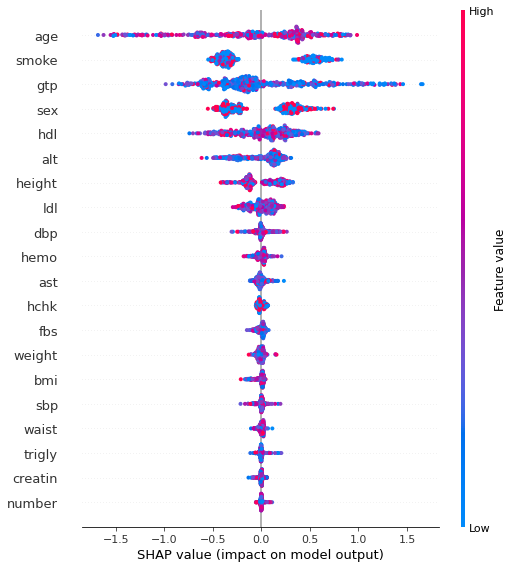

In [225]:
# summary_plot
# 특성값과 예측에 미치는 영향사이의 관계지표
# gtp외에는 명확히 설명하기는 구분해서 설명하기가 어려운듯..
shap_values = explainer.shap_values(X_test.iloc[:500])
shap.summary_plot(shap_values, X_train.iloc[:500])

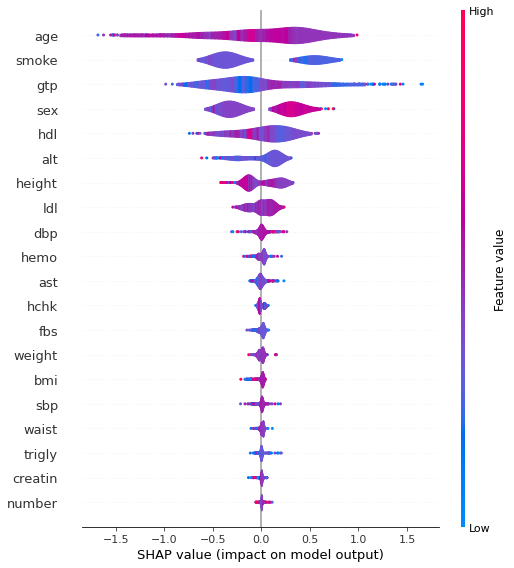

In [226]:
shap.summary_plot(shap_values, X_train.iloc[:500], plot_type= 'violin')

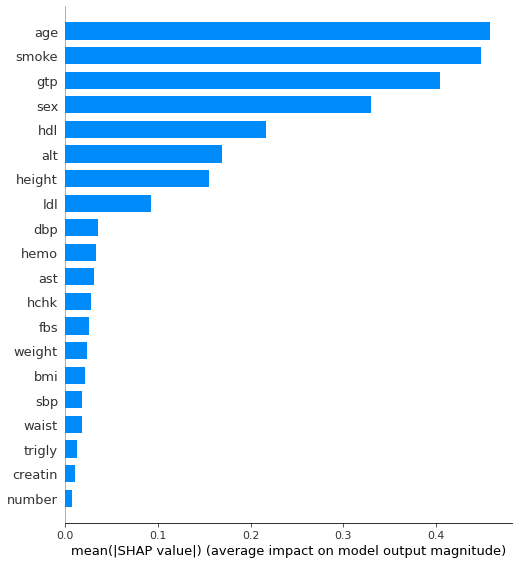

In [70]:
shap.summary_plot(shap_values, X_train.iloc[:500], plot_type= 'bar')
